## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df = pd.read_csv('employment_rates_by_graduate_type_200723.csv')

## Preprocessing and Data Cleaning

In [4]:
df.head(10)

,time_period,time_identifier,geographic_level,country_code,country_name,age_group,graduate_type,employment_rate,hs_employment_rate,unemployment_rate,inactivity_rate,employment_accuracy_flag,hs_employment_accuracy_flag,unemployment_accuracy_flag,inactive_accuracy_flag
0,2007,Calendar year,National,E92000001,England,16-64,Graduate,87.3,68.7,2.8,10.2,0,0,0,0
1,2007,Calendar year,National,E92000001,England,16-64,Non-Graduate,72.2,23.4,6.2,23.1,0,0,0,0
2,2007,Calendar year,National,E92000001,England,16-64,Postgraduate,89.1,81.3,2.6,8.5,0,0,0,0
3,2007,Calendar year,National,E92000001,England,21-30,Graduate,86.9,60.1,4.1,9.4,0,0,0,0
4,2007,Calendar year,National,E92000001,England,21-30,Non-Graduate,72.6,20.0,7.8,21.2,0,0,0,0
5,2007,Calendar year,National,E92000001,England,21-30,Postgraduate,88.2,75.9,3.2,8.9,0,0,4,0
6,2008,Calendar year,National,E92000001,England,16-64,Graduate,86.0,68.7,3.2,11.2,0,0,0,0
7,2008,Calendar year,National,E92000001,England,16-64,Non-Graduate,69.8,22.6,6.7,25.2,0,0,0,0
8,2008,Calendar year,National,E92000001,England,16-64,Postgraduate,87.4,79.2,2.4,10.4,0,0,0,0
9,2008,Calendar year,National,E92000001,England,21-30,Graduate,86.7,61.3,4.6,9.1,0,0,0,0


In [6]:
df.describe()

,time_period,employment_rate,hs_employment_rate,unemployment_rate,inactivity_rate,employment_accuracy_flag,hs_employment_accuracy_flag,unemployment_accuracy_flag,inactive_accuracy_flag
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.0,102.000000,102.000000
mean,2015.000000,81.535294,52.584314,5.263725,14.061765,0.0,0.0,0.578431,0.058824
std,4.923172,8.016316,24.166742,2.625080,6.794538,0.0,0.0,1.338214,0.441050
min,2007.000000,66.500000,14.700000,1.900000,6.400000,0.0,0.0,0.000000,0.000000
25%,2011.000000,72.300000,22.025000,3.200000,9.025000,0.0,0.0,0.000000,0.000000
50%,2015.000000,86.300000,63.500000,4.650000,10.350000,0.0,0.0,0.000000,0.000000
75%,2019.000000,87.400000,73.300000,6.500000,21.275000,0.0,0.0,0.000000,0.000000
max,2023.000000,90.800000,81.300000,13.100000,27.600000,0.0,0.0,4.000000,4.000000


In [8]:
df.shape

(102, 15)

In [13]:
df.columns

Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
       'country_name', 'age_group', 'graduate_type', 'employment_rate',
       'hs_employment_rate', 'unemployment_rate', 'inactivity_rate',
       'employment_accuracy_flag', 'hs_employment_accuracy_flag',
       'unemployment_accuracy_flag', 'inactive_accuracy_flag'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time_period                  102 non-null    int64  
 1   time_identifier              102 non-null    object 
 2   geographic_level             102 non-null    object 
 3   country_code                 102 non-null    object 
 4   country_name                 102 non-null    object 
 5   age_group                    102 non-null    object 
 6   graduate_type                102 non-null    object 
 7   employment_rate              102 non-null    float64
 8   hs_employment_rate           102 non-null    float64
 9   unemployment_rate            102 non-null    float64
 10  inactivity_rate              102 non-null    float64
 11  employment_accuracy_flag     102 non-null    int64  
 12  hs_employment_accuracy_flag  102 non-null    int64  
 13  unemployment_accurac

In [14]:
# Drop accuracy flag columns
columns_to_drop = [
    'employment_accuracy_flag',
    'hs_employment_accuracy_flag',
    'unemployment_accuracy_flag',
    'inactive_accuracy_flag'
]
df_cleaned = df.drop(columns=columns_to_drop)

In [15]:
# Rename columns for better readability
df_cleaned.rename(columns={
    'time_period': 'year',
    'graduate_type': 'graduate_status',
    'hs_employment_rate': 'high_skill_employment_rate'
}, inplace=True)


In [17]:
# Check for missing values and duplicates
print(df_cleaned.isnull().sum())
print("Number of duplicates:", df_cleaned.duplicated().sum())

year                          0
time_identifier               0
geographic_level              0
country_code                  0
country_name                  0
age_group                     0
graduate_status               0
employment_rate               0
high_skill_employment_rate    0
unemployment_rate             0
inactivity_rate               0
dtype: int64
Number of duplicates: 0


In [19]:
df_cleaned.head(10)

,year,time_identifier,geographic_level,country_code,country_name,age_group,graduate_status,employment_rate,high_skill_employment_rate,unemployment_rate,inactivity_rate
0,2007,Calendar year,National,E92000001,England,16-64,Graduate,87.3,68.7,2.8,10.2
1,2007,Calendar year,National,E92000001,England,16-64,Non-Graduate,72.2,23.4,6.2,23.1
2,2007,Calendar year,National,E92000001,England,16-64,Postgraduate,89.1,81.3,2.6,8.5
3,2007,Calendar year,National,E92000001,England,21-30,Graduate,86.9,60.1,4.1,9.4
4,2007,Calendar year,National,E92000001,England,21-30,Non-Graduate,72.6,20.0,7.8,21.2
5,2007,Calendar year,National,E92000001,England,21-30,Postgraduate,88.2,75.9,3.2,8.9
6,2008,Calendar year,National,E92000001,England,16-64,Graduate,86.0,68.7,3.2,11.2
7,2008,Calendar year,National,E92000001,England,16-64,Non-Graduate,69.8,22.6,6.7,25.2
8,2008,Calendar year,National,E92000001,England,16-64,Postgraduate,87.4,79.2,2.4,10.4
9,2008,Calendar year,National,E92000001,England,21-30,Graduate,86.7,61.3,4.6,9.1


## Exploratory Data Analysis 

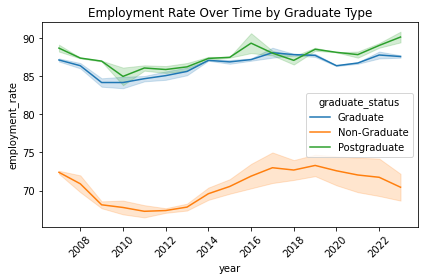

In [20]:
# Employment rate trends over the years by graduate type
sns.lineplot(data=df_cleaned, x='year', y='employment_rate', hue='graduate_status')
plt.title('Employment Rate Over Time by Graduate Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

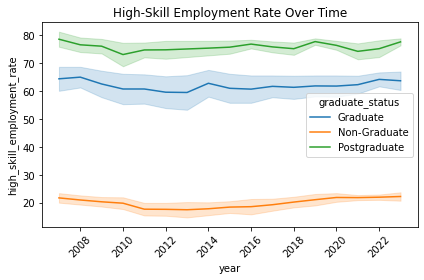

In [21]:

# High-skill employment trend
sns.lineplot(data=df_cleaned, x='year', y='high_skill_employment_rate', hue='graduate_status')
plt.title('High-Skill Employment Rate Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

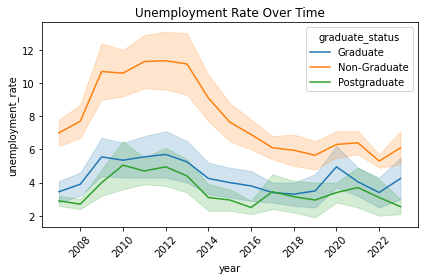

In [22]:
# Unemployment comparison
sns.lineplot(data=df_cleaned, x='year', y='unemployment_rate', hue='graduate_status')
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

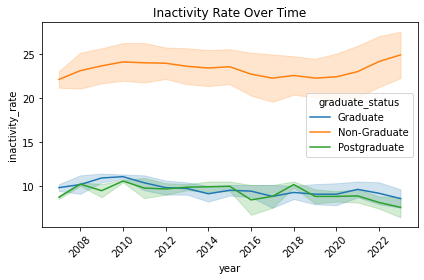

In [24]:
# Inactivity rate
sns.lineplot(data=df_cleaned, x='year', y='inactivity_rate', hue='graduate_status')
plt.title('Inactivity Rate Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
df_cleaned.to_csv('cleaned_graduate_employment.csv', index=False)